In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dfSurvivals = pd.read_excel("dataset/titanic3.xls", index_col=None)
dfSurvivals.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
dfSurvivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [9]:
(dfSurvivals.isnull() | dfSurvivals.empty | dfSurvivals.isna()).sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [10]:
def show_percentage_missing(column_name, data_frame):

    total_rows = data_frame.shape[0]
    
    missing_values = data_frame[column_name].isnull().sum()
    
    percentage_missing = (missing_values / total_rows) * 100
    
    rounded_percentage = round(percentage_missing, 3)
    
    print(f"Percent of missing '{column_name}' records is {rounded_percentage} %")

In [11]:
columns_to_check = ["age", "fare", "cabin", "embarked", "boat", "body", "home.dest"]

for column in columns_to_check:
    show_percentage_missing(column, dfSurvivals)

Percent of missing 'age' records is 20.092 %
Percent of missing 'fare' records is 0.076 %
Percent of missing 'cabin' records is 77.464 %
Percent of missing 'embarked' records is 0.153 %
Percent of missing 'boat' records is 62.872 %
Percent of missing 'body' records is 90.756 %
Percent of missing 'home.dest' records is 43.086 %


In [12]:
count_unique_values = {column: dfSurvivals[column].nunique() for column in ['fare','cabin', 'embarked', 'ticket']}
count_unique_values

{'fare': 281, 'cabin': 186, 'embarked': 3, 'ticket': 939}

In [13]:
dfSurvivals["fare"].fillna(value = dfSurvivals["fare"].mean(), inplace=True)
dfSurvivals["embarked"].fillna(dfSurvivals["embarked"].value_counts().idxmax(), inplace=True)
dfSurvivals["age"].fillna(value = dfSurvivals["age"].mean(), inplace=True)

In [14]:
nrAgeNaN = dfSurvivals["age"].isna().sum()
nrFareNaN = dfSurvivals["fare"].isna().sum()
nrEmbarkedNaN = dfSurvivals["embarked"].isna().sum()
print(f"Now we have {nrAgeNaN} missing values on age column")
print(f"Now we have {nrFareNaN} missing values on fare column")
print(f"Now we have {nrEmbarkedNaN} missing values on embarked column")

Now we have 0 missing values on age column
Now we have 0 missing values on fare column
Now we have 0 missing values on embarked column


In [15]:
dfSurvivals.groupby("survived").size()/len(dfSurvivals)*100

survived
0    61.802903
1    38.197097
dtype: float64

In [16]:
dfSurvivals.groupby("embarked").size()


embarked
C    270
Q    123
S    916
dtype: int64

In [17]:
dfSurvivals.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


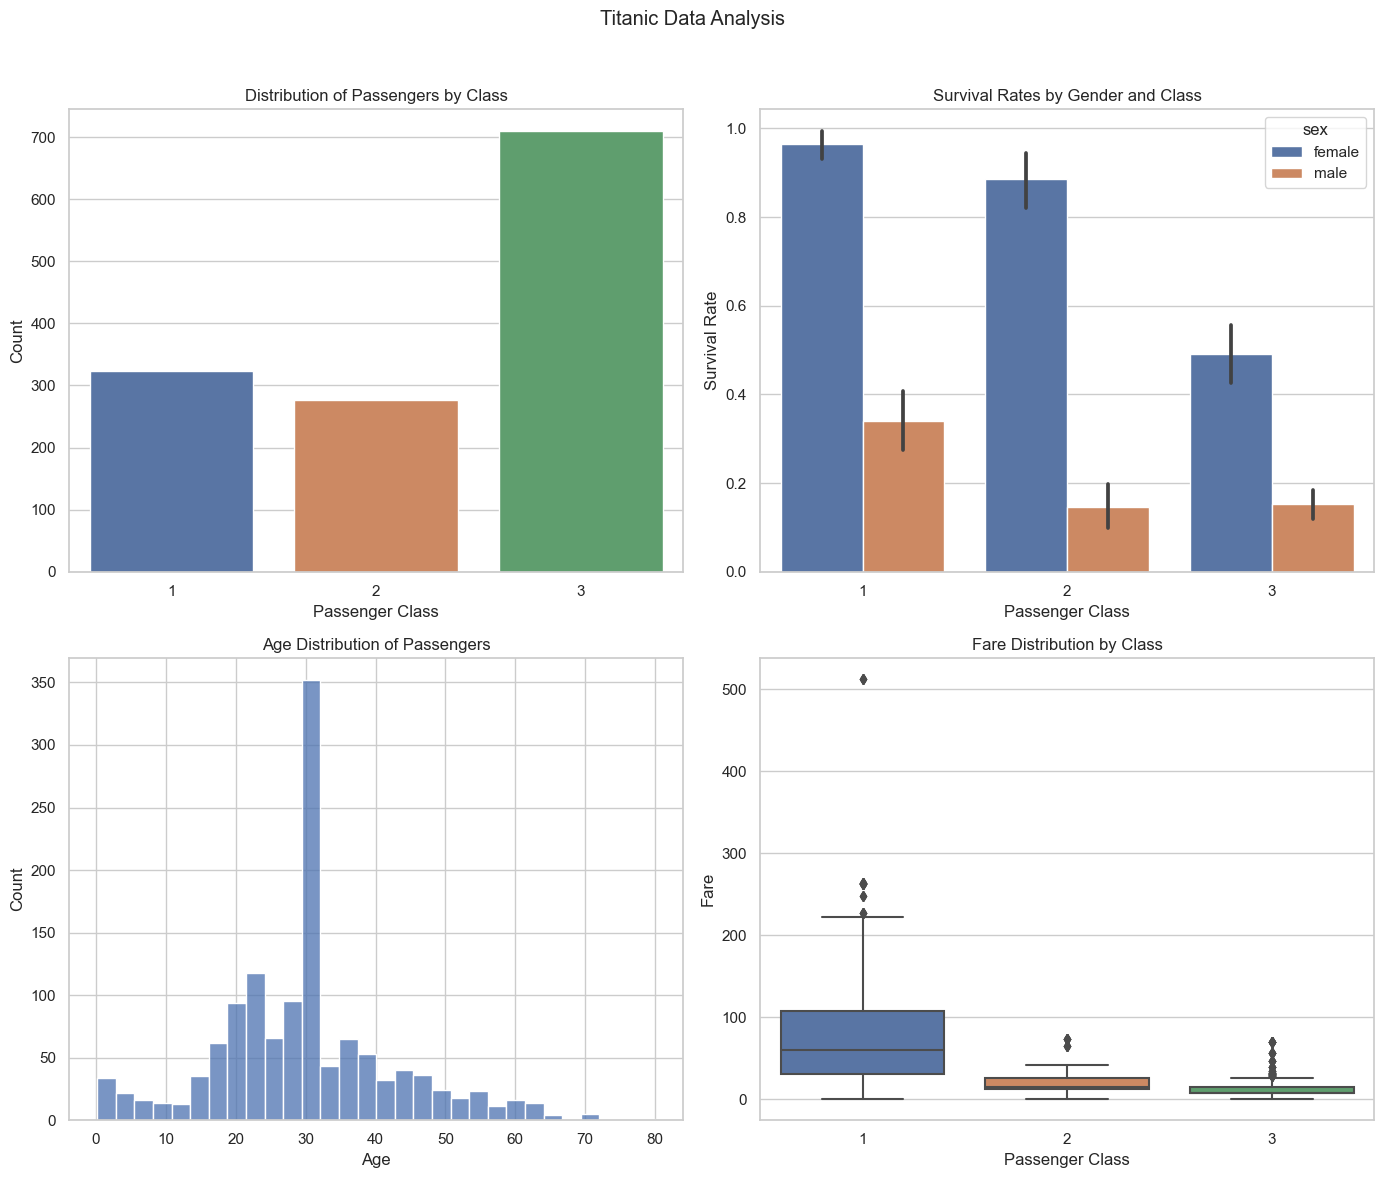

In [22]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Titanic Data Analysis')


# Plot 1: Distribution of passengers by class
sns.countplot(x='pclass', data=dfSurvivals, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Passengers by Class')
axes[0, 0].set_xlabel('Passenger Class')
axes[0, 0].set_ylabel('Count')

# Plot 2: Survival rates by gender and class
sns.barplot(x='pclass', y='survived', hue='sex', data=dfSurvivals, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rates by Gender and Class')
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_ylabel('Survival Rate')

# Plot 3: Age distribution of passengers
sns.histplot(dfSurvivals['age'].dropna(), bins=30, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution of Passengers')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')

# Plot 4: Fare distribution by class
sns.boxplot(x='pclass', y='fare', data=dfSurvivals, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution by Class')
axes[1, 1].set_xlabel('Passenger Class')
axes[1, 1].set_ylabel('Fare')

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\juank\AppData\Local\Temp\ipykernel_10512\3161091028.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfSurvivals.corr()


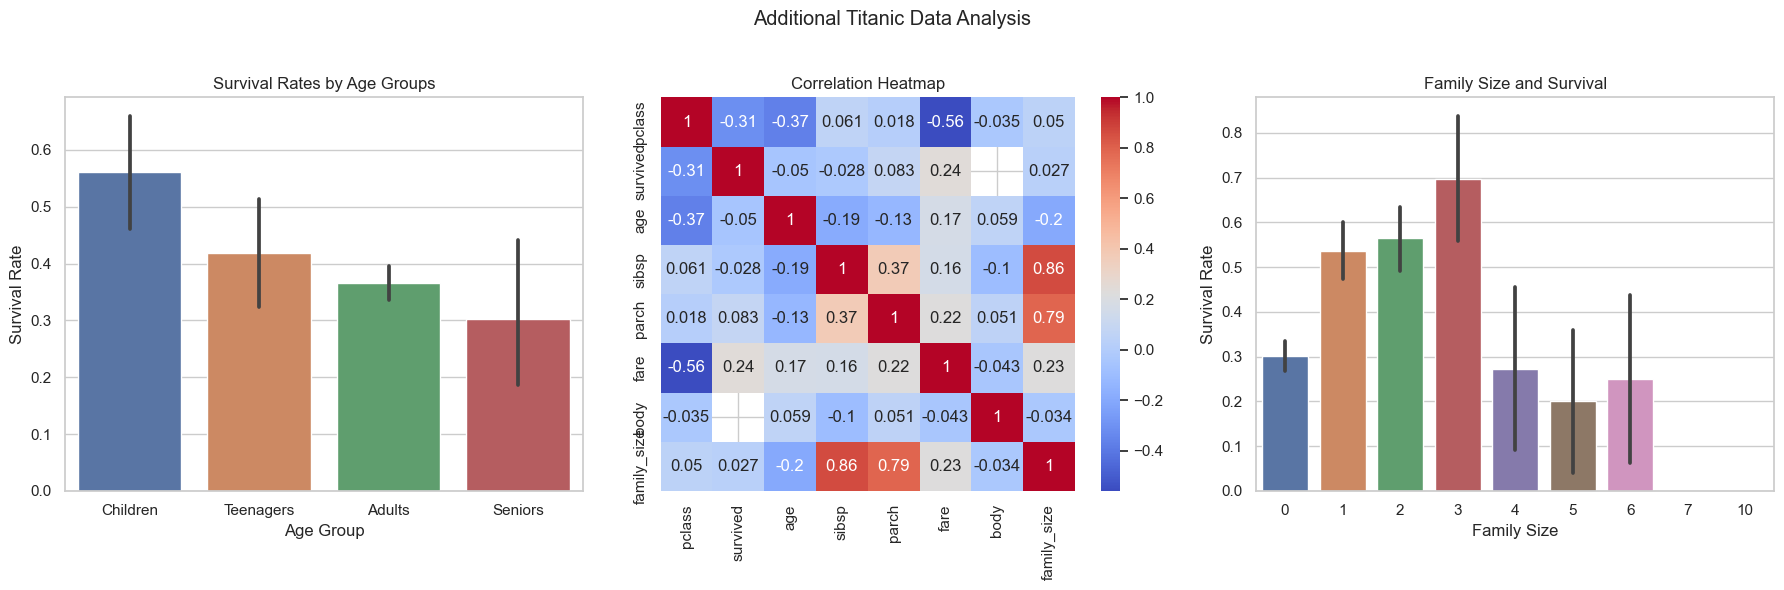

In [23]:

# 1. Create Age Groups
bins = [0, 12, 19, 59, 100]
labels = ['Children', 'Teenagers', 'Adults', 'Seniors']
dfSurvivals['age_group'] = pd.cut(dfSurvivals['age'], bins=bins, labels=labels, right=False)

# 2. Create Family Size feature
dfSurvivals['family_size'] = dfSurvivals['sibsp'] + dfSurvivals['parch']

# Initialize the figure for the three plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Additional Titanic Data Analysis')

# Plot 1: Survival Rates by Age Groups
sns.barplot(x='age_group', y='survived', data=dfSurvivals, ax=axes[0])
axes[0].set_title('Survival Rates by Age Groups')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Survival Rate')

# Plot 2: Correlation Heatmap
correlation_matrix = dfSurvivals.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Heatmap')

# Plot 3: Family Size and Survival
sns.barplot(x='family_size', y='survived', data=dfSurvivals, ax=axes[2])
axes[2].set_title('Family Size and Survival')
axes[2].set_xlabel('Family Size')
axes[2].set_ylabel('Survival Rate')

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()